In [1]:
from param_estimation_tools import *
from common_imports import plt

# Estimation of Sigma

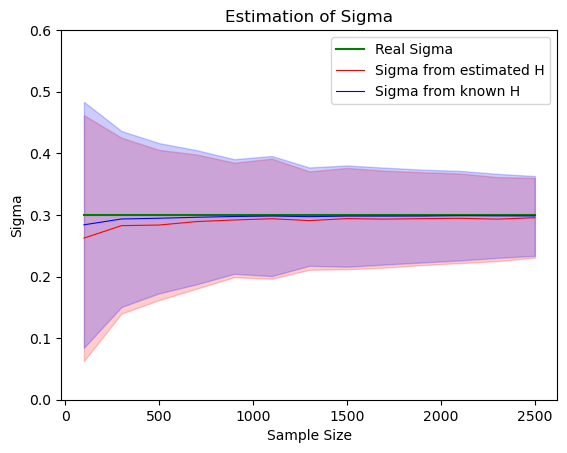

In [3]:
# Define constants
sigma_a = 0.3
H = 0.6
mu = 0
T = 1

# Initialize lists to store results
sigma_1 = []
sigma_2 = []
ci = []
ci2 = []
list_n = []
r_s = []

N = 500
STEP_SIZE = 200
START_N = 100
END_N = 2700
sample_sizes = list(range(START_N, END_N, STEP_SIZE))

for n in sample_sizes:
    list_n.append(n)
    all_sig1 = []
    all_sig2 = []
    # Compute sigma values for each sample size
    for j in range(N):
        s1, s2 = sigma_error(sigma_a, mu, H, n, n_it=10)
        all_sig1.append(s1)
        all_sig2.append(s2)
    all_sig1 = np.array(all_sig1)
    all_sig2 = np.array(all_sig2)
    # Calculate mean and standard deviation for sigma_1
    m1 = np.mean(all_sig1)
    std1 = np.std(all_sig1)
    ci.append(1.96 * std1) # 95% confidence interval
    sigma_1.append(m1)
    # Calculate mean and standard deviation for sigma_2
    m2 = np.mean(all_sig2)
    std2 = np.std(all_sig2)
    ci2.append(1.96 * std2) # 95% confidence interval
    sigma_2.append(m2)

    r_s.append(sigma_a)

sigma_1 = np.array(sigma_1)
sigma_2 = np.array(sigma_2)
ci = np.array(ci)
ci = np.array(ci2)

#plotting
fig, ax = plt.subplots()
ax.plot( list_n, r_s, label="Real Sigma", linewidth=1.5, color="green")
ax.plot(list_n, sigma_2, label="Sigma from estimated H", linewidth=0.8, color="red")
ax.fill_between(list_n, sigma_2 - ci, sigma_2 + ci, color='red', alpha=0.2)
ax.plot( list_n, sigma_1, label="Sigma from known H", linewidth=0.8, color="blue")
ax.fill_between( list_n, sigma_1 - ci, sigma_1 + ci, color='blue', alpha=0.2)

plt.title('Estimation of Sigma')
plt.xlabel('Sample Size')
plt.ylabel('Sigma')
plt.ylim(0, 0.6)

plt.legend()
plt.savefig('sigma_estimation.png')


# Estimation of H

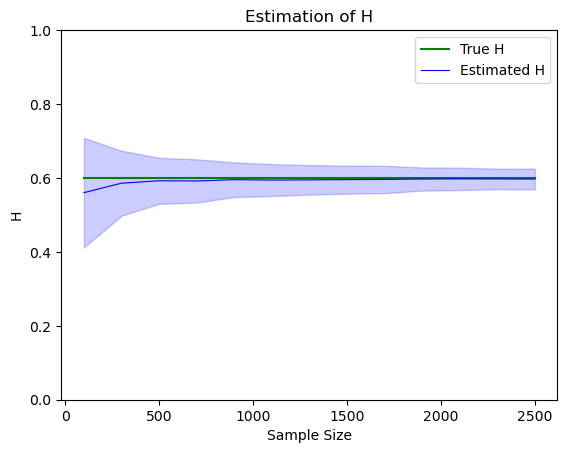

In [4]:
# Constants
sigma_a = 0.3
H = 0.6
mu = 0
T = 1
N = 500
step_size = 200
start_n = 100
end_n = 2700

# Initialize lists for results
liste_n = list(range(start_n, end_n, step_size))
lH1 = []
ci = []
r_s = [H] * len(liste_n)

# Compute H errors for varying sample sizes
for n in liste_n:
    all_H = [H_error(sigma_a, mu, H, n, n_it=10) for _ in range(N)]
    
    # Calculate statistics
    mean_H = np.mean(all_H)
    std_H = np.std(all_H)
    
    lH1.append(mean_H)
    ci.append(1.96 * std_H)

# Plotting
fig, ax = plt.subplots()
ax.plot(liste_n, r_s, label="True H", linewidth=1.5, color="green")
ax.plot(liste_n, lH1, label="Estimated H", linewidth=0.8, color="blue")
ax.fill_between(liste_n, np.array(lH1) - np.array(ci), np.array(lH1) + np.array(ci), color='blue', alpha=0.2)

# Formatting plot
plt.title('Estimation of H')
plt.xlabel('Sample Size')
plt.ylabel('H')
plt.ylim(0, 1)
plt.legend()
plt.savefig('H_estimation.png')
plt.show()


# Estimation of Mu

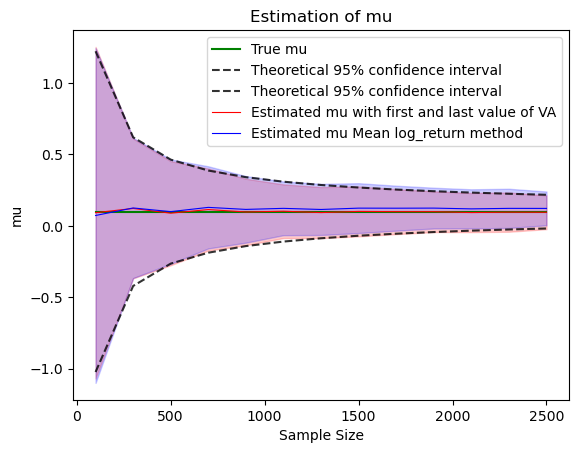

In [5]:
# Constants
sigma_a = 0.3
H = 0.3
mu = 0.1
T = 1
N = 200
step_size = 200
start_n = 100
end_n = 2700

# Initialize lists for results
liste_n = list(range(start_n, end_n, step_size))
mu_v = []
ci = []
mu_v2 = []
ci2 = []
r_s = []
rtest = []

# Compute mu errors for varying sample sizes
for n in liste_n:
    all_mu = []
    all_mu2 = []

    for _ in range(N):
        mu1, mu2 = mu_error(sigma_a, mu, H, n, n_it=10)
        all_mu.append(mu1)
        all_mu2.append(mu2)

    # Convert lists to numpy arrays for statistics
    all_mu = np.array(all_mu)
    all_mu2 = np.array(all_mu2)

    # Calculate statistics
    mean_mu = np.mean(all_mu)
    mean_mu2 = np.mean(all_mu2)
    std_mu = np.std(all_mu)
    std_mu2 = np.std(all_mu2)

    ci.append(1.96 * std_mu)
    ci2.append(1.96 * std_mu2)
    mu_v.append(mean_mu)
    mu_v2.append(mean_mu2)

    r_s.append(mu)
    rtest.append(1.96 * sigma_a * (T * n / 252) ** (H - 1))

# Convert lists to numpy arrays for plotting
r_s = np.array(r_s)
rtest = np.array(rtest)
mu_v = np.array(mu_v)
ci = np.array(ci)
mu_v2 = np.array(mu_v2)
ci2 = np.array(ci2)

# Plotting
fig, ax = plt.subplots()
ax.plot(liste_n, r_s, label="True mu", linewidth=1.5, color="green")
ax.plot(liste_n, r_s + rtest, '--', label="Theoretical 95% confidence interval", linewidth=1.5, color="black", alpha=0.8)
ax.plot(liste_n, r_s - rtest, '--', label="Theoretical 95% confidence interval", linewidth=1.5, color="black", alpha=0.8)
ax.plot(liste_n, mu_v2, label="Estimated mu with first and last value of VA", linewidth=0.8, color="red")
ax.fill_between(liste_n, mu_v2 - ci2, mu_v2 + ci2, color='red', alpha=0.2)
ax.plot(liste_n, mu_v, label="Estimated mu Mean log_return method", linewidth=0.8, color="blue")
ax.fill_between(liste_n, mu_v - ci, mu_v + ci, color='blue', alpha=0.2)

# Formatting plot
plt.title('Estimation of mu')
plt.xlabel('Sample Size')
plt.ylabel('mu')
plt.legend()
plt.savefig('mu_estimation.png')
plt.show()
